# 实验结果绘制

读取一个exp目录下，根据超参平均所有的不同种子的数据，画出均值、标准差曲线

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
sns.set()
from marlpo.utils.plot import *

(/Users/jimmy/Projects/RL/My_RLlib_Algo/marlpo/utils/de
bug.py) rich console -= 30 55

## IPPO
对于IPPO，由于没有超参需要设置，只包含不同种子的trial，只需要聚集不同种子的数据即可。
但IPPO常作为基线跟其他方法对比，所以需要封装好以方便地获取其数据

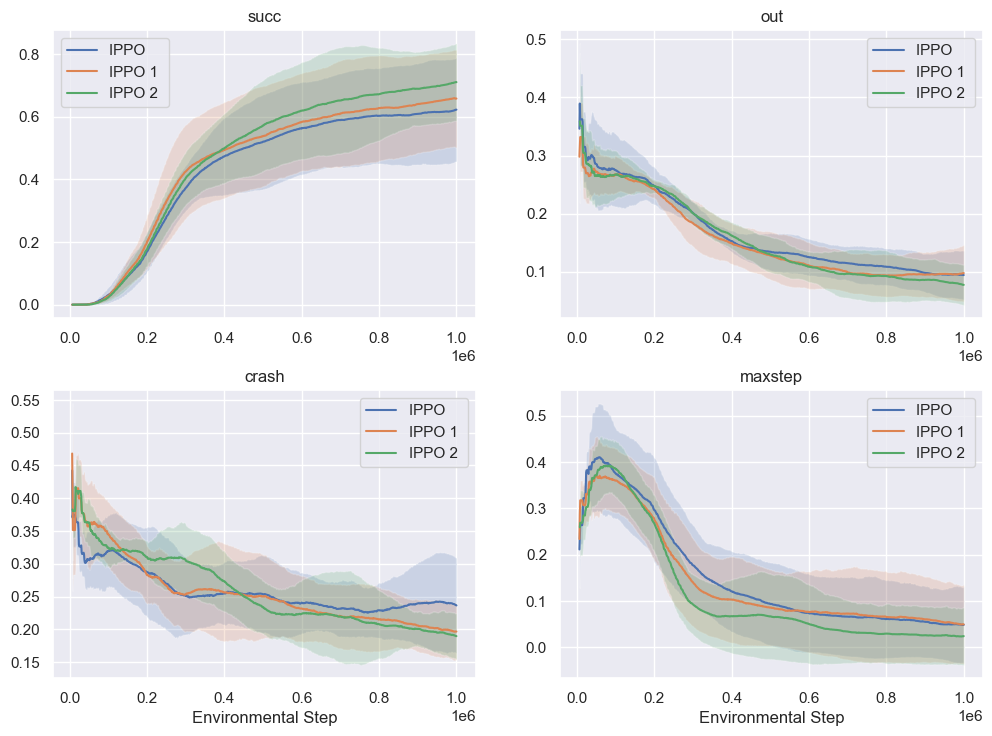

In [23]:
trial_0 = 'exp_results/IPPO_Intersection_8seeds_30agents'
trial_1 = 'exp_results/IPPO_Intersection_8seeds_30agents_repeat'
trial_2 = 'exp_results/IPPO_Intersection_8seeds_30agents_repeat2'

# aram_pattern_dict = get_param_patthern({
#     'agents': [['4a', '8a', '16a'], ['4', '8', '16']],
#     'num_lasers': [['', ], ['72',]],
#     # 'num_lasers': [['', 'no_lidar'], ['72', '0']],
# }) # {lable -> re pattern}

exps = {
    trial_0: dict(
        algo_name='IPPO',
    ),
    trial_1: dict(
        algo_name='IPPO 1',
    ),
    trial_2: dict(
        algo_name='IPPO 2',
    ),
}

compare_all_metrics_for_multi_experiments(exps)

In [9]:
ippo_baseline_dir = 'exp_results/IPPO_Intersection_8seeds_30agents_repeat2'
ippo_baseline_info = dict(
    algo_name='IPPO',
)

## CCPPO

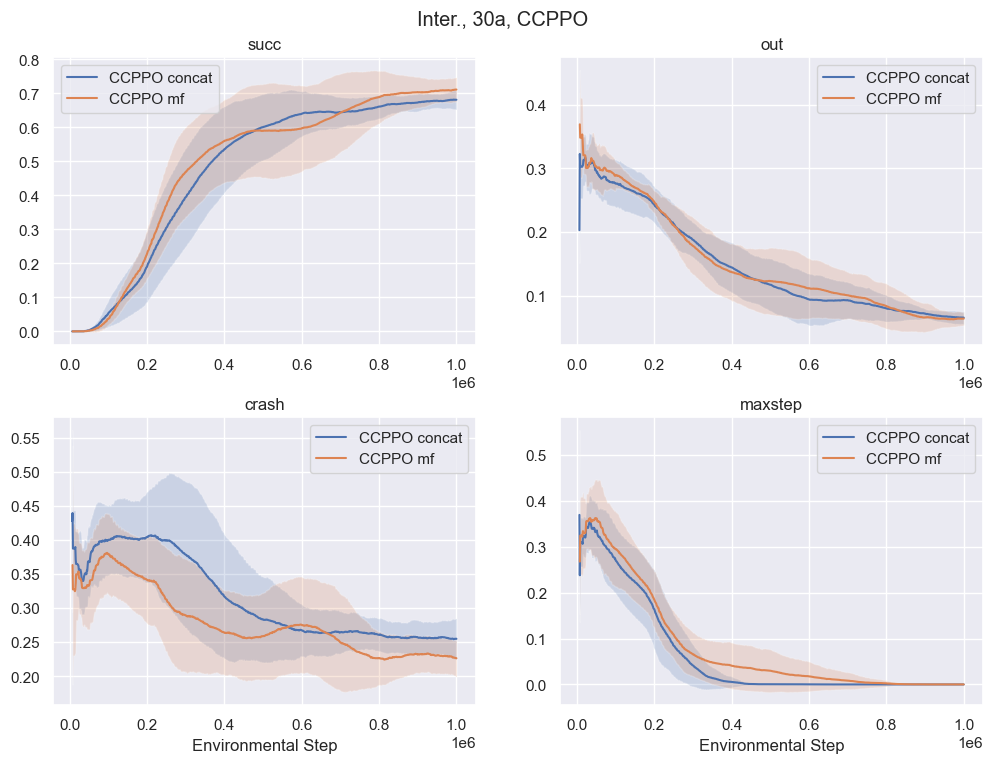

In [4]:
exp_dir = 'exp_results/CCPPO_Intersection_8seeds_30agents'
param_space = {
    'fuse_mode': [['concat', 'mf'], ['concat', 'mf']],
}
param_pattern_dict = get_param_patthern(param_space) # {lable -> re pattern}

compare_all_metrics_in_one_experiment(exp_dir=exp_dir, algo_name='CCPPO', param_pattern_dict=param_pattern_dict, title='Inter., 30a, CCPPO')

## ARCCPPO

exp param:
- attention 
- random_order

### 不同算法对比

Reading csv in exp_results/IPPO_Intersection_8seeds_30agents...

100%|██████████| 8/8 [00:00<00:00, 31.53it/s]


Finished reading 8 seed:  12000, 8000, 10000, 6000, 9000, 7000, 11000, 5000

╭────────── generating param spaces ──────────╮
│ input param space:  total  1  params.       │
│ param combinations: total 2=2 combinations: │
│ ------------------- ----------------------- │
│ param label 1:      concat                  │
│ param label 2:      mf                      │
╰─────────────────────────────────────────────╯

Reading csv in exp_results/CCPPO_Intersection_8seeds_30agents...

100%|██████████| 16/16 [00:00<00:00, 62.00it/s]


Finished reading 8 seed:  11000, 7000, 9000, 8000, 5000, 10000, 12000, 6000

Reading csv in exp_results/CCPPO_Intersection_8seeds_30agents...

100%|██████████| 16/16 [00:00<00:00, 63.42it/s]


Finished reading 8 seed:  9000, 11000, 6000, 7000, 12000, 8000, 10000, 5000

╭─────────── generating param spaces ───────────╮
│ input param space:  total  2  params.         │
│ param combinations: total 1x1=1 combinations: │
│ ------------------- ------------------------- │
│ param label 1:      mlp & id                  │
╰───────────────────────────────────────────────╯

Reading csv in exp_results/ARCCPPO_Intersection_8seeds_30agents_atn_mlp_no_ro...

100%|██████████| 16/16 [00:00<00:00, 63.24it/s]


Finished reading 8 seed:  5000, 7000, 8000, 11000, 12000, 9000, 10000, 6000

╭───────────── generating param spaces ─────────────╮
│ input param space:  total  4  params.             │
│ param combinations: total 1x1x1x1=1 combinations: │
│ ------------------- ----------------------------- │
│ param label 1:      ^cf & mf & mlp & id           │
╰───────────────────────────────────────────────────╯

Reading csv in exp_results/ARCCPPO_Intersection_8seeds_30agents_atn_cc...

100%|██████████| 128/128 [00:00<00:00, 522.05it/s]


Finished reading 8 seed:  7000, 8000, 12000, 9000, 5000, 6000, 10000, 11000

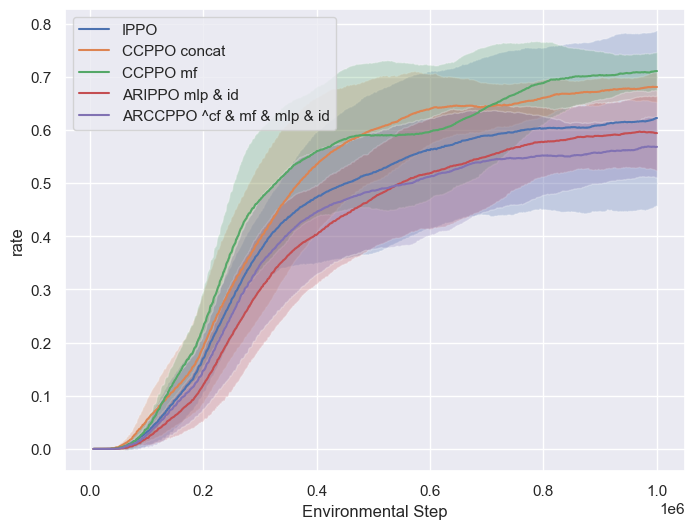

In [16]:
plt.figure(figsize=(8, 6))
# 1. IPPO
ippo_exp_dir = 'exp_results/IPPO_Intersection_8seeds_30agents'
seed_pattern = r'start_seed=(\d*)'
plot_one_exp(ippo_exp_dir, seed_pattern, col=succ_col, exp_label='IPPO')


# 2. CCPPO
ccppo_exp_dir = 'exp_results/CCPPO_Intersection_8seeds_30agents'
param_space = {
    'fuse_mode': [['concat', 'mf'],  ['concat', 'mf']],
}
param_pattern_dict = get_param_patthern(param_space) # {lable -> re pattern}
for label, pattern in param_pattern_dict.items():
    label = 'CCPPO ' + label 
    plot_one_exp(ccppo_exp_dir, param_pattern=pattern, col=succ_col, exp_label=label)


# 3. ARIPPO
# arccppo_exp_dir = 'exp_results/ARCCPPO_Intersection_8seeds_30agents_atn'
mlp_no_ro_dir_1 = 'exp_results/ARCCPPO_Intersection_8seeds_30agents_atn_mlp_no_ro'
param_space = {
    # 'use_attention': [['atn', 'mlp'], ['True', 'False']],
    'use_attention': [['mlp'], ['False']],
    # 'use_attention': [['atn', 'mlp'], ['True', 'False']],
    # 'random_order': [['ro'], ['True']],
    'random_order': [['id'], ['False']],
    # 'random_order': [['ro', 'id'], ['True', 'False']],
    # 'random_order': [(''), ['True']],
}
param_pattern_dict = get_param_patthern(param_space) # {lable -> re pattern}
for label, pattern in param_pattern_dict.items():
    label = 'ARIPPO ' + label 
    plot_one_exp(mlp_no_ro_dir_1, param_pattern=pattern, col=succ_col, exp_label=label)

# 4. ARCCPPO
exp_dir = 'exp_results/ARCCPPO_Intersection_8seeds_30agents_atn_cc'
param_space = {
    # 'use_attention': [['atn', 'mlp'], ['True', 'False']],
    # 'counterfactual': [['cf', '^cf'], ['True', 'False']],
    'counterfactual': [['^cf'], ['False']],
    'fuse_mode': [['mf'], ['mf']],
    # 'fuse_mode': [['concat'], ['concat']],
    # 'fuse_mode': [['concat', 'mf'], ['concat', 'mf']],
    'use_attention': [['mlp'], ['False']],
    # 'use_attention': [['atn', 'mlp'], ['True', 'False']],
    # 'random_order': [['ro'], ['True']],
    'random_order': [['id'], ['False']],
    # 'random_order': [['ro', 'id'], ['True', 'False']],
    # 'random_order': [(''), ['True']],
}
param_pattern_dict = get_param_patthern(param_space) # {lable -> re pattern}
for label, pattern in param_pattern_dict.items():
    label = 'ARCCPPO ' + label 
    plot_one_exp(exp_dir, param_pattern=pattern, col=succ_col, exp_label=label)


# pattern = r'use_attention=True(.*?)random_order=True'
# plot_one_exp(exp_dir=exp_dir, param_pattern=pattern, col=succ_col, exp_label='ARCCPPO (atn & ro)')

# pattern = r'use_attention=True(.*?)random_order=False'
# plot_one_exp(exp_dir=exp_dir, param_pattern=pattern, col=succ_col, exp_label='ARCCPPO (atn & ^ro')

# pattern = r'use_attention=False(.*?)random_order=True'
# plot_one_exp(exp_dir=exp_dir, param_pattern=pattern, col=succ_col, exp_label='ARCCPPO (mlp & ro)')

# pattern = r'use_attention=False(.*?)random_order=False'
# plot_one_exp(exp_dir=exp_dir, param_pattern=pattern, col=succ_col, exp_label='ARCCPPO (mlp & ^ro')

In [17]:
mlp_no_ro_dir = 'exp_results/ARCCPPO_Intersection_8seeds_30agents_atn/mlp_no_ro_8seeds'
plot_one_exp(arccppo_exp_dir)

NameError: name 'arccppo_exp_dir' is not defined

Reading csv...


100%|██████████| 8/8 [00:00<00:00, 29.13it/s]


Finished reading 8 seed:  5000, 10000, 7000, 6000, 9000, 8000, 12000, 11000
use_attention [['mlp'], ['False']]
random_order [['ro', 'id'], ['True', 'False']]
----
[['use_attention=False'], ['random_order=True', 'random_order=False']]
[['mlp'], ['ro', 'id']]
Reading csv...


100%|██████████| 16/16 [00:00<00:00, 61.04it/s]


Finished reading 8 seed:  8000, 6000, 5000, 12000, 10000, 11000, 7000, 9000
Reading csv...


100%|██████████| 16/16 [00:00<00:00, 65.60it/s]


Finished reading 8 seed:  5000, 7000, 8000, 11000, 12000, 9000, 10000, 6000


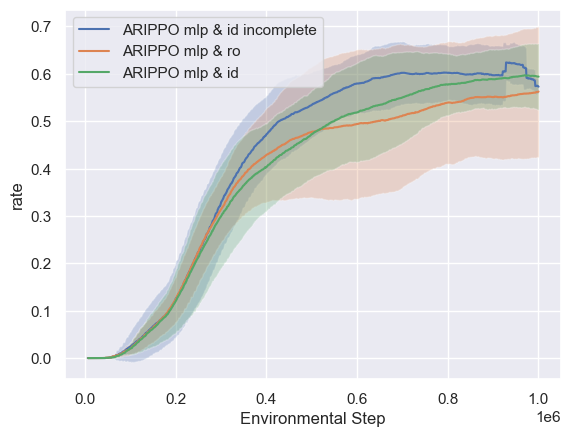

In [153]:
mlp_no_ro_dir_0 = 'exp_results/ARCCPPO_Intersection_8seeds_30agents_atn/mlp_no_ro_8seeds'
plot_one_exp(mlp_no_ro_dir_0, param_pattern=pattern, col=succ_col, exp_label="ARIPPO mlp & id incomplete")


mlp_no_ro_dir_1 = 'exp_results/ARCCPPO_Intersection_8seeds_30agents_atn_mlp_no_ro'
param_space = {
    # 'use_attention': [['atn', 'mlp'], ['True', 'False']],
    'use_attention': [['mlp'], ['False']],
    # 'use_attention': [['atn', 'mlp'], ['True', 'False']],
    # 'random_order': [['ro'], ['True']],
    # 'random_order': [['id'], ['False']],
    'random_order': [['ro', 'id'], ['True', 'False']],
}
param_pattern_dict = get_param_patthern(param_space) # {lable -> re pattern}
for label, pattern in param_pattern_dict.items():
    label = 'ARIPPO ' + label 
    plot_one_exp(mlp_no_ro_dir_1, param_pattern=pattern, col=succ_col, exp_label=label)



## 状态输入消融实验

### IPPO 1-agent in Intersection with & without lidar

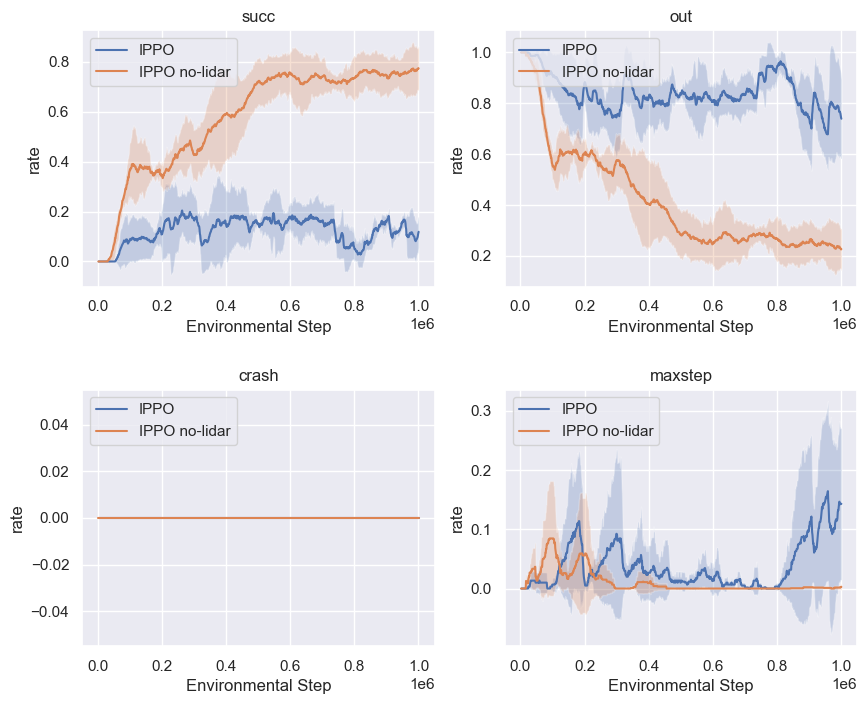

In [4]:
ippo_exp_dir = 'exp_results/IPPO_Intersection_3seeds_1agents_single_agent_test'
ippo_exp_dir_no_lidar = 'exp_results/IPPO_Intersection_3seeds_1agents_single_agent_test_no_lidar'

compare_all_metrics({
    'IPPO': ippo_exp_dir,
    'IPPO no-lidar': ippo_exp_dir_no_lidar
})

Text(0.5, 0.98, '1-agent no lidar 1e6 steps')

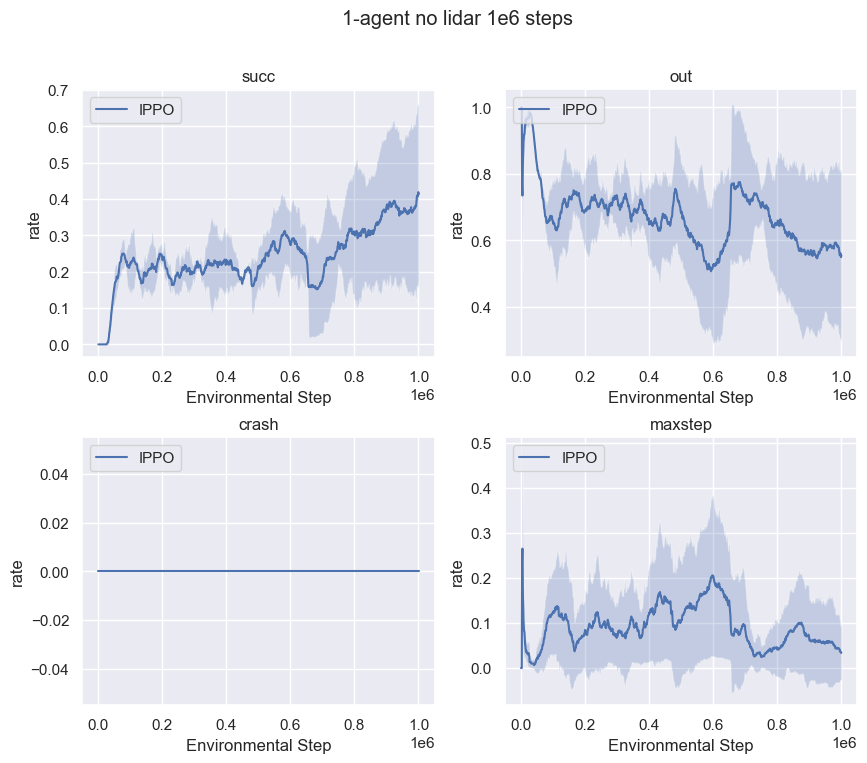

In [2]:
exp_dir = 'exp_results/IPPO_Inter_1agents_(1-agent-no-lidar-1e6)'
compare_all_metrics({
    'IPPO': exp_dir,
})
plt.suptitle('1-agent no lidar 1e6 steps')

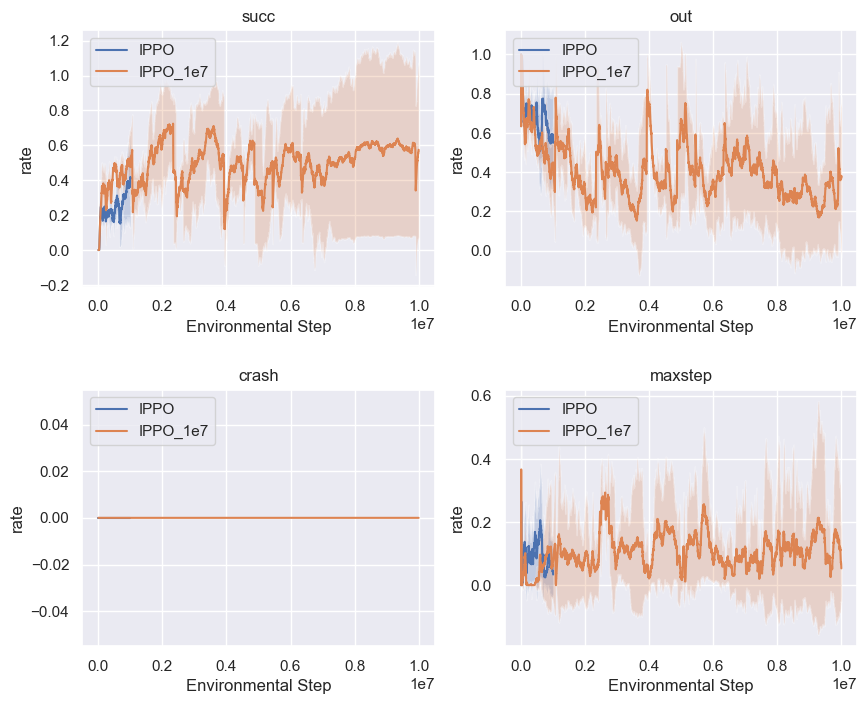

In [10]:
exp_dir_1e7 = 'exp_results/IPPO_Inter_1agents_(1-agent-no-lidar-1e7)'
exp_dir_1e6 = 'exp_results/IPPO_Inter_1agents_(1-agent-no-lidar-1e6)'
compare_all_metrics({
    'IPPO': exp_dir_1e6,
    'IPPO_1e7': exp_dir_1e7,
})

### 4-, 8-, 16-, 30- agents Inter. with & without lidar

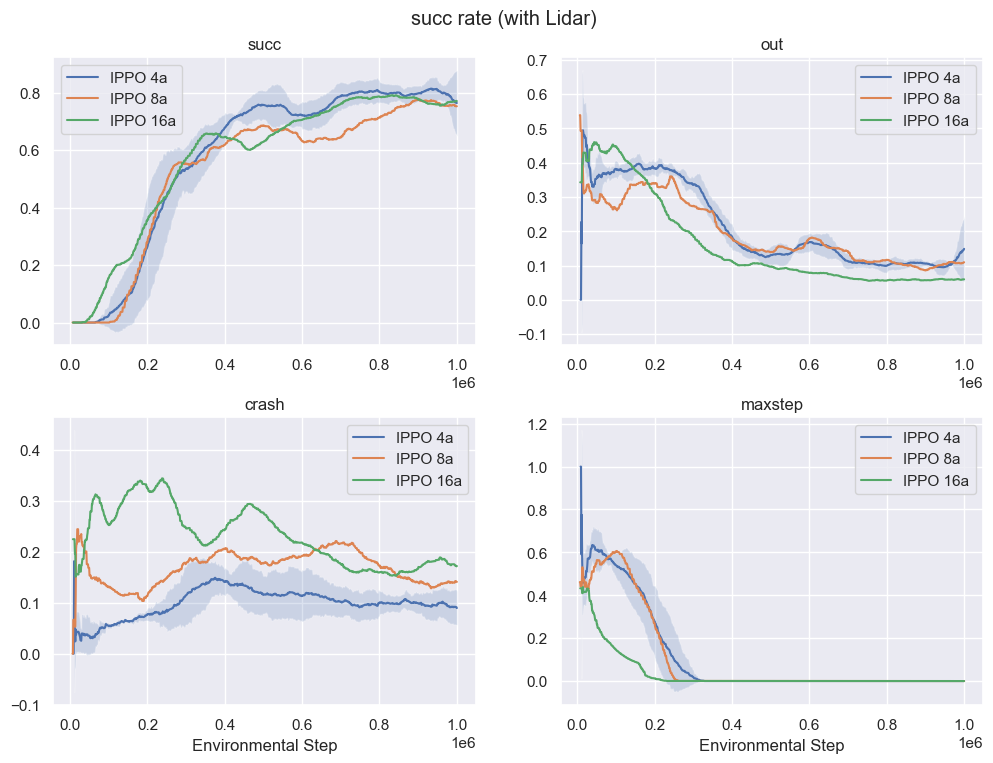

In [7]:
exp_dir = 'exp_results/IPPO_Inter_[4, 8, 16]agents_(if_no_lidar)'

param_pattern_dict = get_param_patthern({
    'agents': [['4a', '8a', '16a'], ['4', '8', '16']],
    'num_lasers': [['', ], ['72',]],
    # 'num_lasers': [['', 'no_lidar'], ['72', '0']],
}) # {lable -> re pattern}

exps = {
    exp_dir: dict(
        algo_name='IPPO',
        param_pattern_dict=param_pattern_dict,
    ),
    ippo_baseline_dir: ippo_baseline_info,
}

title = 'The Importance of Lidar'
compare_all_metrics_for_multi_experiments(exps, title=title)
# compare_all_metrics_in_one_experiment(exp_dir=exp_dir, algo_name='IPPO', param_pattern_dict=param_pattern_dict, title=title)


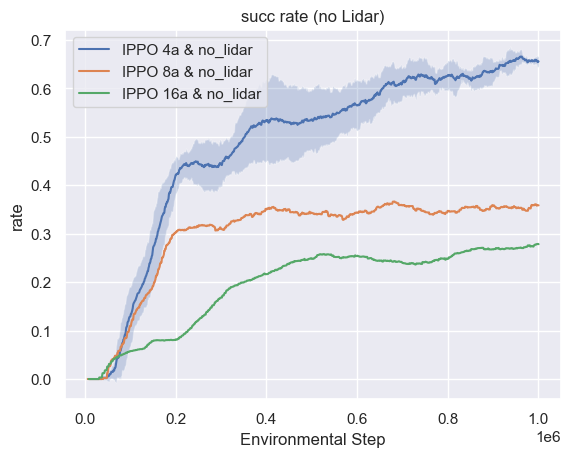

In [33]:
exp_dir = 'exp_results/IPPO_Inter._[4, 8, 16]agents_if_need_lidar'
param_space = {
    'agents': [['4a', '8a', '16a'], ['4', '8', '16']],
    'num_lasers': [['no_lidar'], ['0']],
}
param_pattern_dict = get_param_patthern(param_space) # {lable -> re pattern}
col = succ_col
title = 'succ rate (no Lidar)'

for label, pattern in param_pattern_dict.items():
    label = 'IPPO ' + label 
    plot_one_exp(exp_dir, param_pattern=pattern, col=col, title=title, exp_label=label)


#### Crash rate:

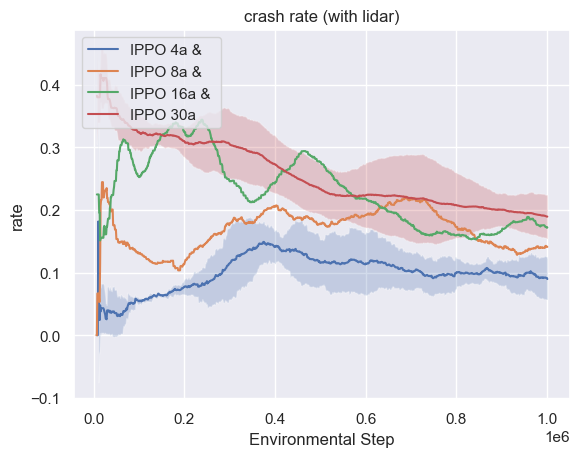

In [35]:
param_space = {
    'agents': [['4a', '8a', '16a'], ['4', '8', '16']],
    'num_lasers': [['', ], ['72',]],
    # 'num_lasers': [['', 'no_lidar'], ['72', '0']],
}
param_pattern_dict = get_param_patthern(param_space) # {lable -> re pattern}
col = crash_col
title = 'crash rate (with lidar)'
for label, pattern in param_pattern_dict.items():
    label = 'IPPO ' + label 
    plot_one_exp(exp_dir, param_pattern=pattern, col=col, title=title, exp_label=label)

pattern = r'start_seed=(\d*)'

exp_dir_30a = 'exp_results/IPPO_Intersection_8seeds_30agents_repeat2'
plot_one_exp(exp_dir_30a, param_pattern=pattern, col=col, title=title, exp_label='IPPO 30a')

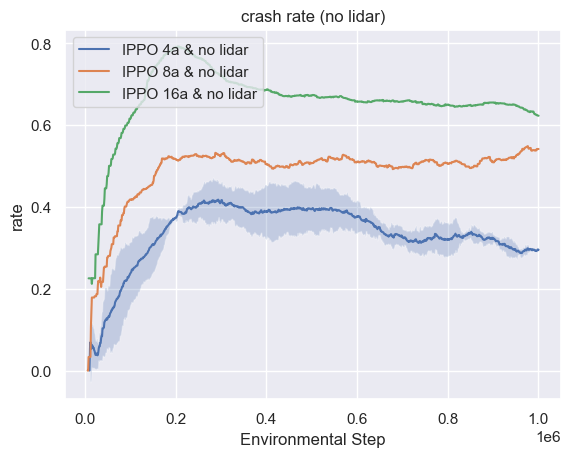

In [36]:
exp_dir = 'exp_results/IPPO_Inter._[4, 8, 16]agents_if_need_lidar'
param_space = {
    'agents': [['4a', '8a', '16a'], ['4', '8', '16']],
    'num_lasers': [['no lidar', ], ['0',]],
    # 'num_lasers': [['', 'no_lidar'], ['72', '0']],
}
param_pattern_dict = get_param_patthern(param_space) # {lable -> re pattern}
col = crash_col
title = 'crash rate (no lidar)'
for label, pattern in param_pattern_dict.items():
    label = 'IPPO ' + label 
    plot_one_exp(exp_dir, param_pattern=pattern, col=col, title=title, exp_label=label)


#### Out rate:

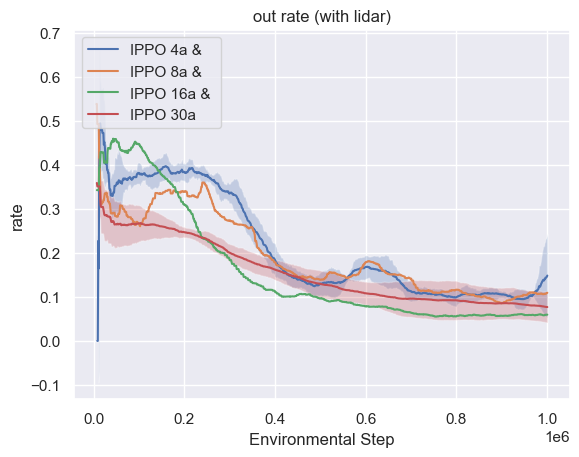

In [37]:
param_space = {
    'agents': [['4a', '8a', '16a'], ['4', '8', '16']],
    'num_lasers': [['', ], ['72',]],
    # 'num_lasers': [['', 'no_lidar'], ['72', '0']],
}
param_pattern_dict = get_param_patthern(param_space) # {lable -> re pattern}
col = out_col
title = 'out rate (with lidar)'
for label, pattern in param_pattern_dict.items():
    label = 'IPPO ' + label 
    plot_one_exp(exp_dir, param_pattern=pattern, col=col, title=title, exp_label=label)

pattern = r'start_seed=(\d*)'

exp_dir_30a = 'exp_results/IPPO_Intersection_8seeds_30agents_repeat2'
plot_one_exp(exp_dir_30a, param_pattern=pattern, col=col, title=title, exp_label='IPPO 30a')

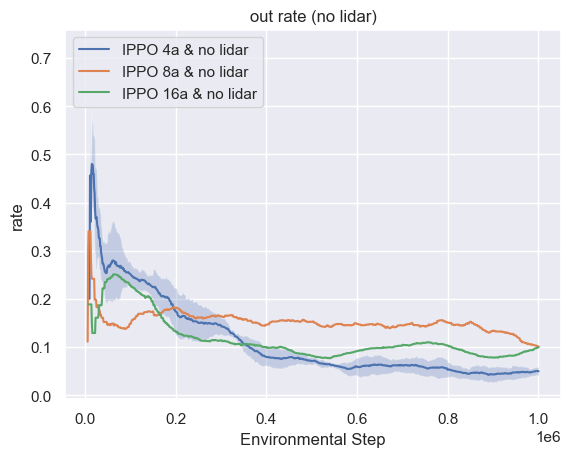

In [38]:
exp_dir = 'exp_results/IPPO_Inter._[4, 8, 16]agents_if_need_lidar'
param_space = {
    'agents': [['4a', '8a', '16a'], ['4', '8', '16']],
    'num_lasers': [['no lidar', ], ['0',]],
    # 'num_lasers': [['', 'no_lidar'], ['72', '0']],
}
param_pattern_dict = get_param_patthern(param_space) # {lable -> re pattern}
col = out_col
title = 'out rate (no lidar)'
for label, pattern in param_pattern_dict.items():
    label = 'IPPO ' + label 
    plot_one_exp(exp_dir, param_pattern=pattern, col=col, title=title, exp_label=label)


#### maxstep rate:

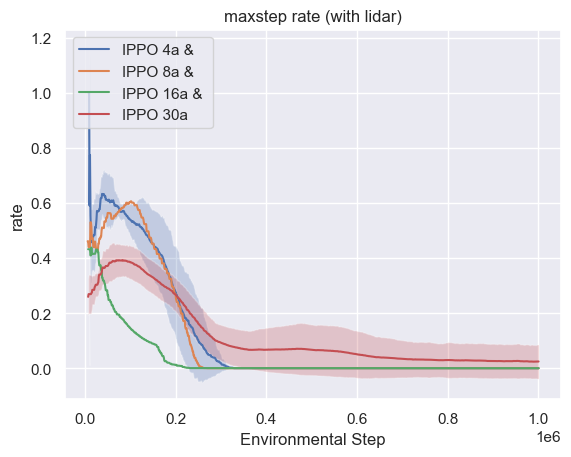

In [39]:
param_space = {
    'agents': [['4a', '8a', '16a'], ['4', '8', '16']],
    'num_lasers': [['', ], ['72',]],
    # 'num_lasers': [['', 'no_lidar'], ['72', '0']],
}
param_pattern_dict = get_param_patthern(param_space) # {lable -> re pattern}
col = maxstep_col
title = 'maxstep rate (with lidar)'
for label, pattern in param_pattern_dict.items():
    label = 'IPPO ' + label 
    plot_one_exp(exp_dir, param_pattern=pattern, col=col, title=title, exp_label=label)

pattern = r'start_seed=(\d*)'

exp_dir_30a = 'exp_results/IPPO_Intersection_8seeds_30agents_repeat2'
plot_one_exp(exp_dir_30a, param_pattern=pattern, col=col, title=title, exp_label='IPPO 30a')

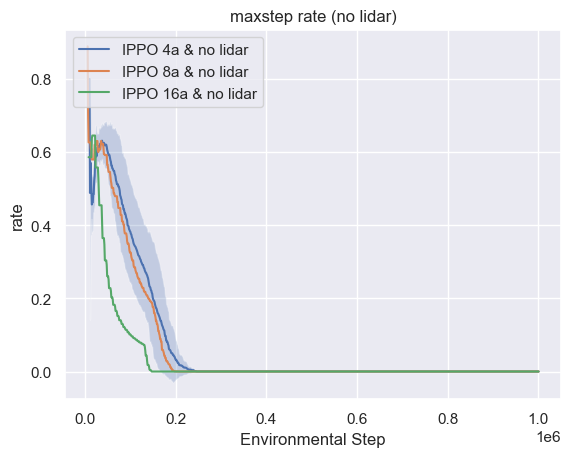

In [40]:
exp_dir = 'exp_results/IPPO_Inter._[4, 8, 16]agents_if_need_lidar'
param_space = {
    'agents': [['4a', '8a', '16a'], ['4', '8', '16']],
    'num_lasers': [['no lidar', ], ['0',]],
    # 'num_lasers': [['', 'no_lidar'], ['72', '0']],
}
param_pattern_dict = get_param_patthern(param_space) # {lable -> re pattern}
col = maxstep_col
title = 'maxstep rate (no lidar)'
for label, pattern in param_pattern_dict.items():
    label = 'IPPO ' + label 
    plot_one_exp(exp_dir, param_pattern=pattern, col=col, title=title, exp_label=label)


### 16 agents with & no lidar

In [3]:
exp_dir = 'exp_results/IPPO_Inter._[4, 8, 16]agents_if_need_lidar'
param_space = {
    'agents': [['16a'], ['16']],
    'num_lasers': [['', 'no lidar'], ['72', '0']],
}
param_pattern_dict = get_param_patthern(param_space) # {lable -> re pattern}
col = succ_col
title = 'succ rate (with Lidar)'

for label, pattern in param_pattern_dict.items():
    label = 'IPPO ' + label 
    plot_one_exp(exp_dir, param_pattern=pattern, col=col, title=title, exp_label=label)


pattern = r'start_seed=(\d*)'

exp_dir_30a = 'exp_results/IPPO_Intersection_8seeds_30agents_repeat2'

plot_one_exp(exp_dir_30a, param_pattern=pattern, col=col, title=title, exp_label='IPPO 30a')

FileNotFoundError: [Errno 2] No such file or directory: 'exp_results/IPPO_Inter._[4, 8, 16]agents_if_need_lidar'

### Ego-state concatenated with 4 Neighbour-state 
- mlp actor 
- nei state has navi

`nei_distance = 40m`

`num_nei = 4`


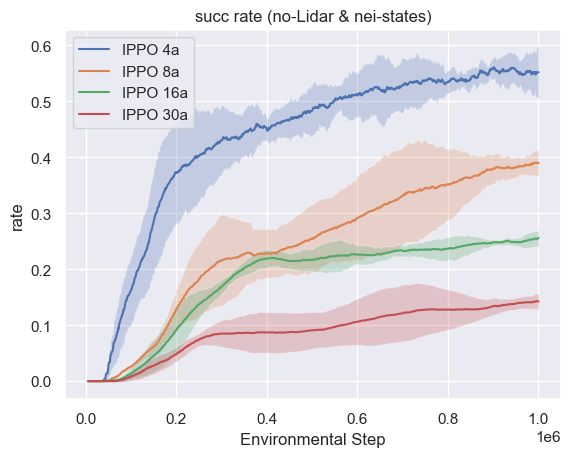

In [4]:
exp_dir = 'exp_results/IPPO_Inter_4-8-16-30agents_no_lidar'
param_space = {
    'agents': [['4a', '8a', '16a', '30a'], ['4', '8', '16', '30']],
    # 'num_lasers': [['', 'no lidar'], ['72', '0']],
}
param_pattern_dict = get_param_patthern(param_space) # {lable -> re pattern}
col = succ_col
title = 'succ rate (no-Lidar & nei-states)'

for label, pattern in param_pattern_dict.items():
    label = 'IPPO ' + label 
    plot_one_exp(exp_dir, param_pattern=pattern, col=col, title=title, exp_label=label)


结论：4个邻近车辆的状态还是太多了，而且其他车辆的状态中还包含它们的下2个导航点信息，增加了网络输入维度，增加了输入噪声

### Ego-state with Fewer Neighbour-state (mlp actor)

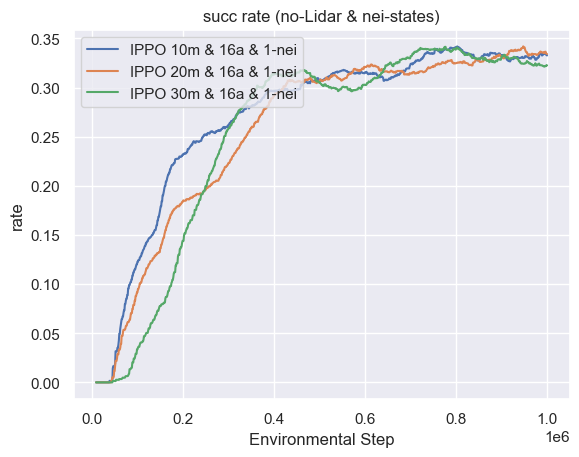

In [10]:
exp_dir = 'exp_results/IPPO_Inter_16agents_16a_nei_state'

param_space = {
    'neighbours_distance': [['10m', '20m', '30m'], ['10', '20', '30']],
    'agents': [['16a'], ['16']],
    'num_neighbours': [['1-nei'], ['1']]
}
param_pattern_dict = get_param_patthern(param_space) # {lable -> re pattern}

col = succ_col
title = 'succ rate (no-Lidar & nei-states)'

for label, pattern in param_pattern_dict.items():
    label = 'IPPO ' + label 
    plot_one_exp(exp_dir, param_pattern=pattern, col=col, title=title, exp_label=label, verbose=False)


### Fewer Neighbours 

with nei-navi

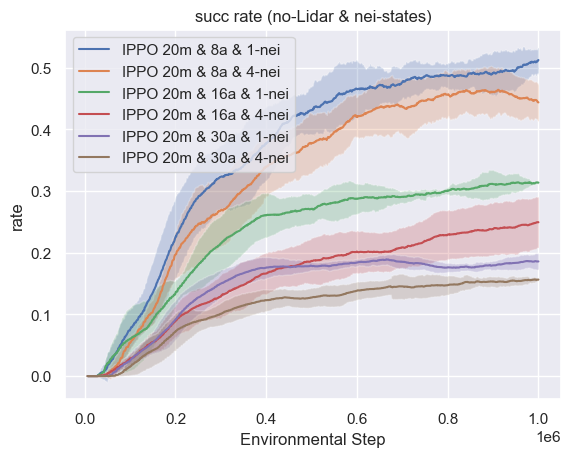

In [11]:
exp_dir = 'exp_results/IPPO_Inter_8-16-30agents_fewer_neighbour'
param_space = {
    'neighbours_distance': [['20m'], ['20']],
    'agents': [['8a', '16a', '30a'], ['8', '16', '30']],
    'num_neighbours': [['1-nei', '4-nei'], ['1', '4']]
}
param_pattern_dict = get_param_patthern(param_space) # {lable -> re pattern}

col = succ_col
title = 'succ rate (no-Lidar & nei-states)'

for label, pattern in param_pattern_dict.items():
    label = 'IPPO ' + label 
    plot_one_exp(exp_dir, param_pattern=pattern, col=col, title=title, exp_label=label, verbose=False)


### Comparing with & without Nei-Navi (mlp actor)

1. `[Ego-State] [Ego-Navi]x2 [Nei-State] [Nei-Navi]x2`

2. `[Ego-State] [Ego-Navi]x2 [Nei-State]`


nei_distance = 40m

num_neighbours = 4

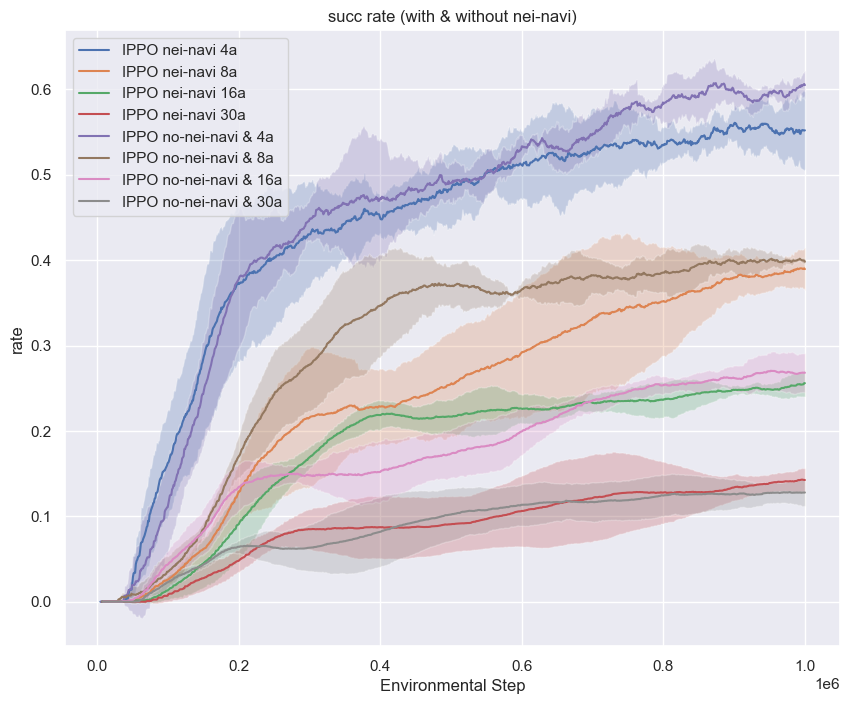

In [5]:
plt.figure(figsize=(10, 8))

exp_dir = 'exp_results/IPPO_Inter_4-8-16-30agents_no_lidar'
param_space = {
    'agents': [['4a', '8a', '16a', '30a'], ['4', '8', '16', '30']],
    # 'num_lasers': [['', 'no lidar'], ['72', '0']],
}
param_pattern_dict = get_param_patthern(param_space) # {lable -> re pattern}
col = succ_col
title = 'succ rate (no-Lidar & nei-states)'

for label, pattern in param_pattern_dict.items():
    label = 'IPPO nei-navi ' + label 
    plot_one_exp(exp_dir, param_pattern=pattern, col=col, title=title, exp_label=label)


exp_dir = 'exp_results/IPPO_Inter_4-8-16-30agents_no-nei-navi'
param_space = {
    'nei_navi': [['no-nei-navi'], ['False']],
    'agents': [['4a', '8a', '16a', '30a'], ['4', '8', '16', '30']],
}
param_pattern_dict = get_param_patthern(param_space) # {lable -> re pattern}

col = succ_col
title = 'succ rate (with & without nei-navi)'

for label, pattern in param_pattern_dict.items():
    label = 'IPPO ' + label 
    plot_one_exp(exp_dir, param_pattern=pattern, col=col, title=title, exp_label=label, verbose=False)


### if lidar needed

╭─────────── generating total 2 param spaces ───────────╮
│ input params:             ['agents', 'num_lasers']    │
│ param combinations:       total 4x2=8 combinations    │
│ ------------------------- --------------------------- │
│ label:                    re pattern:                 │
│ ------------------------- --------------------------- │
│ (label 1) 4a & lidar:     agents=4(.*?)num_lasers=72  │
│ (label 2) 4a & no-lidar:  agents=4(.*?)num_lasers=0   │
│ (label 3) 8a & lidar:     agents=8(.*?)num_lasers=72  │
│ (label 4) 8a & no-lidar:  agents=8(.*?)num_lasers=0   │
│ (label 5) 16a & lidar:    agents=16(.*?)num_lasers=72 │
│ (label 6) 16a & no-lidar: agents=16(.*?)num_lasers=0  │
│ (label 7) 30a & lidar:    agents=30(.*?)num_lasers=72 │
│ (label 8) 30a & no-lidar: agents=30(.*?)num_lasers=0  │
╰───────────────────────────────────────────────────────╯

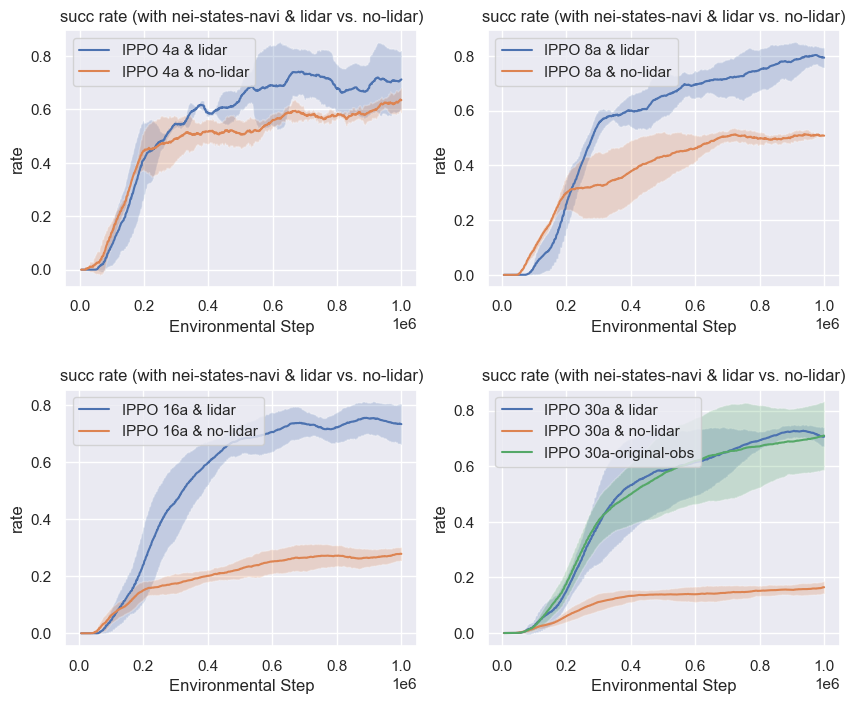

: 

In [19]:
exp_dir = 'exp_results/IPPO_Inter_4-8-16-30agents_1-nei-with-navi&lidar'
param_space = {
    # 'agents': [['30a-add-1-nei-state-navi'], ['30']],
    'agents': [['4a', '8a', '16a', '30a'], ['4', '8', '16', '30']],
    'num_lasers': [['lidar', 'no-lidar'], ['72', '0']],
}
param_pattern_dict = get_param_patthern(param_space, verbose=True) # {lable -> re pattern}

col = succ_col
title = 'succ rate (with nei-states-navi & lidar vs. no-lidar)'

i = 0
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
for label, pattern in param_pattern_dict.items():
    if i % 2 == 0:
        plt.subplot(2,2,i//2+1)
    label = 'IPPO ' + label
    plot_one_exp(exp_dir, param_pattern=pattern, col=col, title=title, exp_label=label)

    i += 1

exp_dir_30a = 'exp_results/IPPO_Intersection_8seeds_30agents_repeat2'

plot_one_exp(exp_dir_30a, col=col, title=title, exp_label='IPPO 30a-original-obs')

### 雷达及邻居数量、邻居信息对不同车密度的影响

╭─────────────────────────────── generating total 4 param spaces ────────────────────────────────╮
│ input params:               ['nei_navi', 'agents', 'num_neighbours', 'num_lasers']             │
│ param combinations:         total 2x1x1x1=2 combinations                                       │
│ --------------------------- ------------------------------------------------------------------ │
│ label:                      re pattern:                                                        │
│ --------------------------- ------------------------------------------------------------------ │
│ (label 1) nei-navi & 4a:    nei_navi=True(.*?)agents=4(.*?)num_neighbours=1(.*?)num_lasers=72  │
│ (label 2) no-nei-navi & 4a: nei_navi=False(.*?)agents=4(.*?)num_neighbours=1(.*?)num_lasers=72 │
╰────────────────────────────────────────────────────────────────────────────────────────────────╯

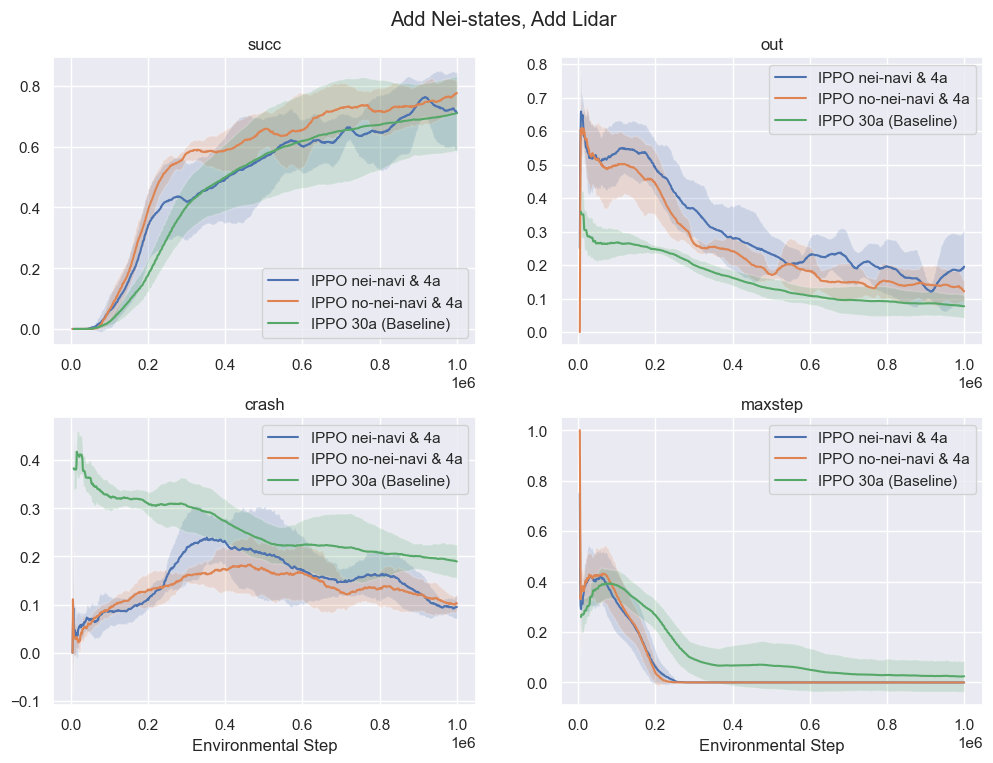

In [21]:
exp_dir = 'exp_results/IPPO_Inter_4-8-16-30agents_1-nei-with-navi&lidar-8seeds[AIBOY]'
param_space = {
    # 'nei_navi': [[''], ['False']],
    'nei_navi': [['nei-navi', 'no-nei-navi'], ['True', 'False']],
    # 'nei_navi': [[''], ['False']],
    # 'agents': [['4a', '8a', '16a', '30a'], ['4', '8', '16', '30']],
    'agents': [['4a'], ['4']],
    # 'num_neighbours': [['1-nei', '4-nei'], ['1', '4']],
    'num_neighbours': [[''], ['1']],
    'num_lasers': [[''], ['72']],
    # 'num_lasers': [['lidar', 'no-lidar'], ['72', '0']],
}
param_pattern_dict = get_param_patthern(param_space, verbose=True) # {lable -> re pattern}

exp_dir_30a = 'exp_results/IPPO_Intersection_8seeds_30agents_repeat2'

add_plot_args = dict(
    IPPO=dict(
        exp_dir=exp_dir_30a,
        pattern=None, 
        label='30a (Baseline)', 
))
# add_plot_args=None

compare_all_metrics_in_one_experiment(exp_dir, "IPPO", param_pattern_dict, 'Add Nei-states, Add Lidar', add_plot_args)

### Compact Ego- and Nei- states with Lidar

#### no heading

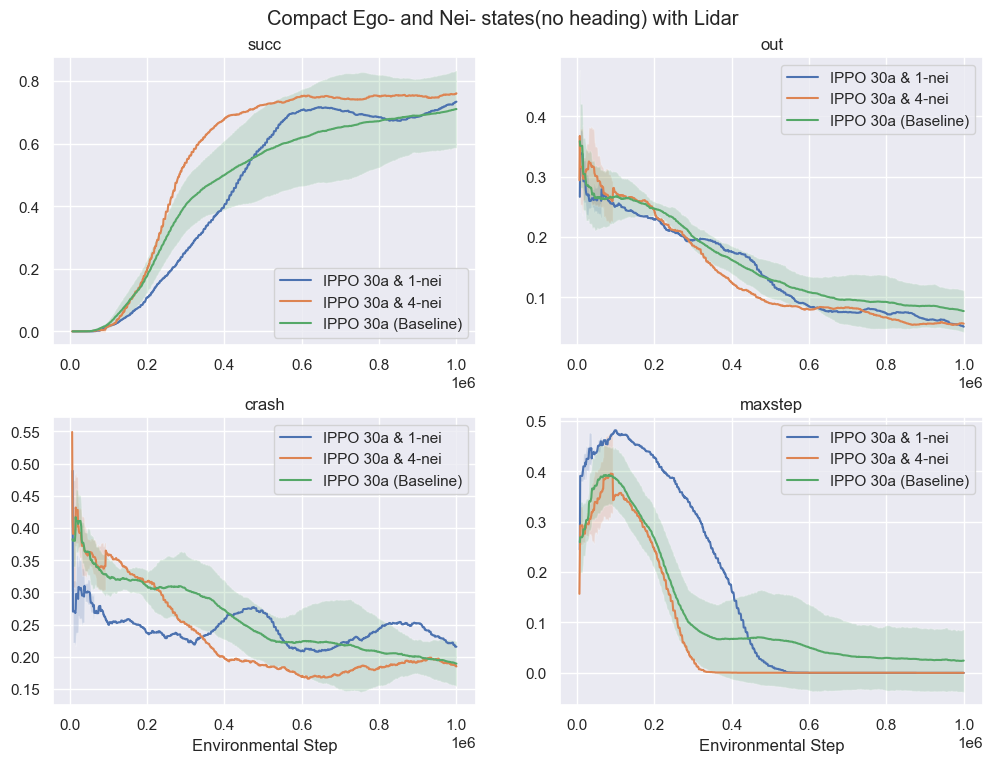

In [26]:
exp_dir = 'exp_results/IPPO_Inter_8-30agents_(compact-state)'
param_space = {
    'agents': [['30a'], ['30']],
    # 'agents': [['8a', '16a', '30a'], ['8', '16', '30']],
    'num_neighbours': [['1-nei', '4-nei'], ['1', '4']],
}
param_pattern_dict = get_param_patthern(param_space, verbose=False) # {lable -> re pattern}

exp_dir_30a = 'exp_results/IPPO_Intersection_8seeds_30agents_repeat2'

add_plot_args = dict(
    IPPO=dict(
        exp_dir=exp_dir_30a,
        pattern=None, 
        label='30a (Baseline)', 
))

compare_all_metrics_in_one_experiment(exp_dir, "IPPO", param_pattern_dict, 'Compact Ego- and Nei- states(no heading) with Lidar', add_plot_args)

#### add heading

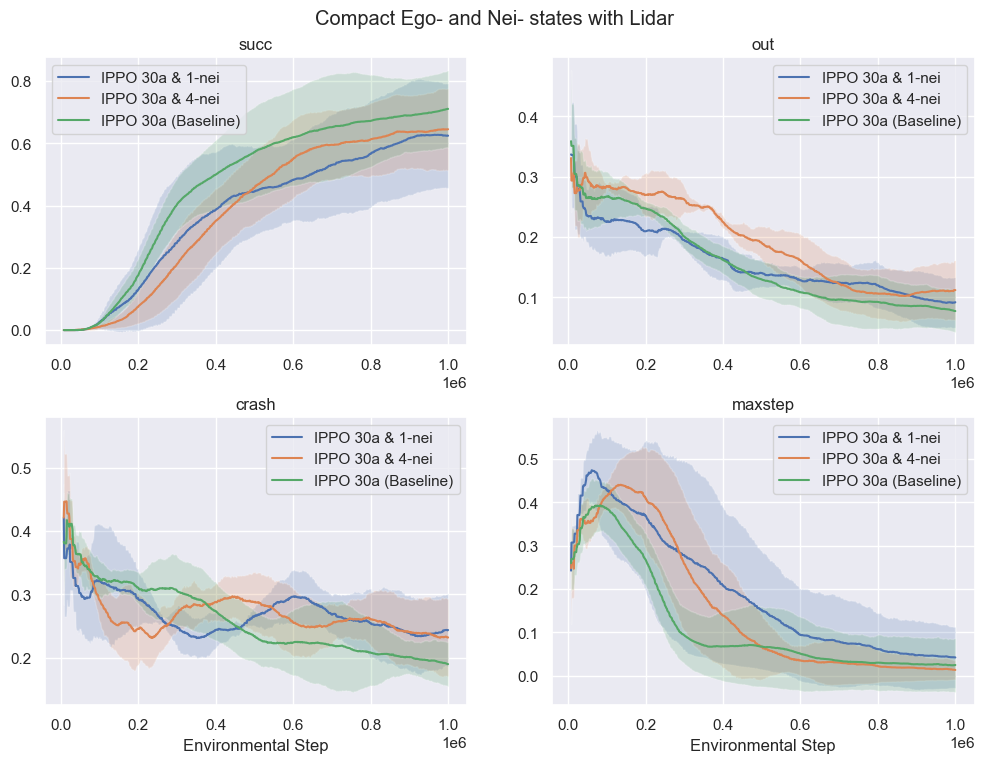

In [36]:
exp_dir = 'exp_results/IPPO_Inter_8-16-30agents_(compact-state)'
param_space = {
    'agents': [['30a'], ['30']],
    # 'agents': [['8a'], ['8']],
    # 'agents': [['8a', '16a', '30a'], ['8', '16', '30']],
    'num_neighbours': [['1-nei', '4-nei'], ['1', '4']],
}
param_pattern_dict = get_param_patthern(param_space, verbose=False) # {lable -> re pattern}

exp_dir_30a = 'exp_results/IPPO_Intersection_8seeds_30agents_repeat2'

add_plot_args = dict(
    IPPO=dict(
        exp_dir=exp_dir_30a,
        pattern=None, 
        label='30a (Baseline)', 
))

compare_all_metrics_in_one_experiment(exp_dir, "IPPO", param_pattern_dict, 'Compact Ego- and Nei- states with Lidar', add_plot_args)

### exp on AIBOY

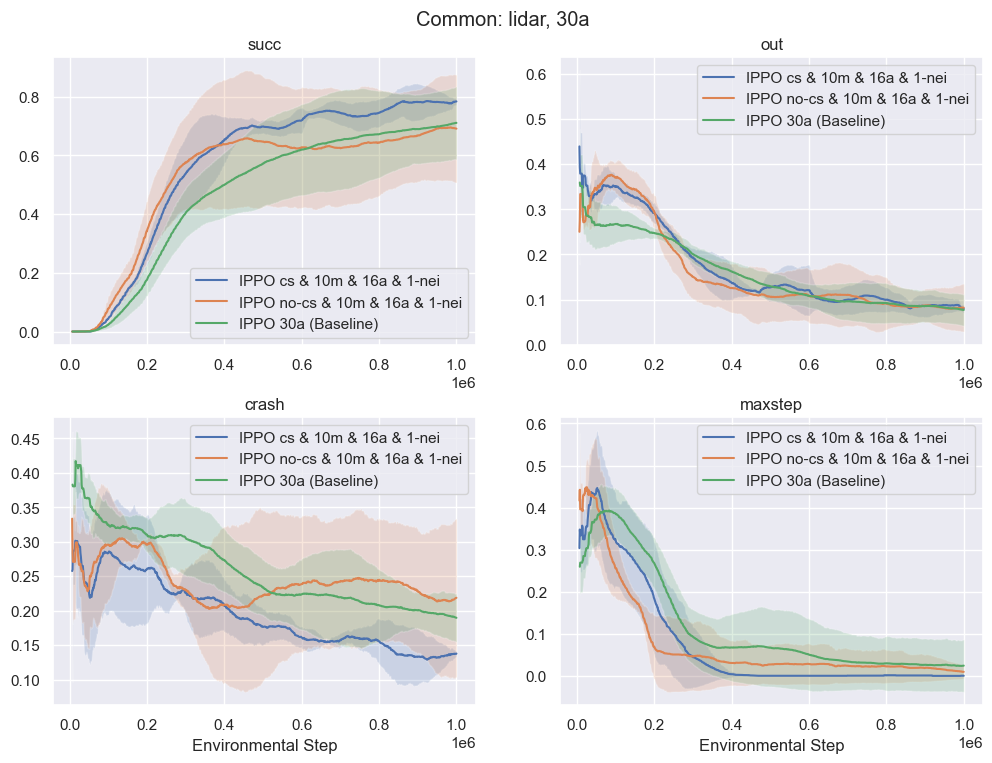

In [31]:
exp_dir = 'exp_results/IPPO_Inter_8-16-30agents_(compact-state)[AIBOY]'
param_space = {
    'add_compact_state': [['cs', 'no-cs'], ['True', 'False']],
    # 'add_compact_state': [['cs'], ['True']],
    # 'add_compact_state': [['no-cs'], ['False']],
    # 'neighbours_distance': [['10m', '20m', '40m'], ['10', '20', '40']],
    'neighbours_distance': [['10m'], ['10']],
    # 'num_agents': [[''], ['30']],
    'num_agents': [['16a'], ['16']],
    # 'num_agents': [['8a', '16a', '30a'], ['8', '16', '30']],
    # 'num_neighbours': [['1-nei', '4-nei'], ['1', '4']],
    'num_neighbours': [['1-nei'], ['1']],
    # 'num_neighbours': [['4-nei'], ['4']],
}
param_pattern_dict = get_param_patthern(param_space, verbose=False) # {lable -> re pattern}

exp_dir_30a = 'exp_results/IPPO_Intersection_8seeds_30agents_repeat2'

add_plot_args = dict(
    IPPO=dict(
        exp_dir=exp_dir_30a,
        pattern=None, 
        label='30a (Baseline)', 
))

compare_all_metrics_in_one_experiment(exp_dir, "IPPO", param_pattern_dict, 'Common: lidar, 30a', add_plot_args)

## Social Attention

### SA encoder

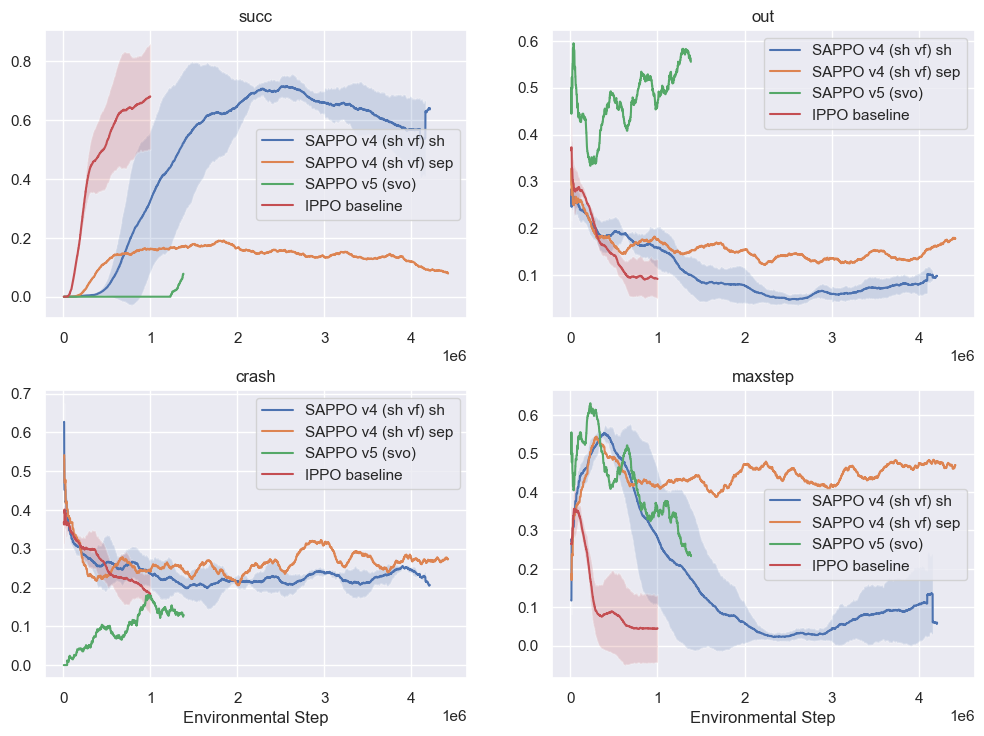

In [7]:

baseline_dir = 'exp_results/IPPO_Intersection_8seeds_30agents_repeat2'
ccppo_dir = 'exp_results/CCPPO_Intersection_8seeds_30agents'
v0_dir = 'exp_results/SAPPO_Inter_30agents_v0'
v1_dir = 'exp_results/SAPPO_Inter_30agents_v1(reduce_head_input)'
v2_dir = 'exp_results/SAPPO_Inter_30agents_v2(better_attention)'
v3_dir = 'exp_results/SAPPO_Inter_30agents_v3(better_attention_layer_norm)'
v4_dir = 'exp_results/SAPPO_Inter_30agents_v4(share_vf)'
v4_dir_5e6 = 'exp_results/SAPPO_Inter_30agents_v4(share_vf_5e6)'
# v4_dir_3e6 = 'exp_results/SAPPO_Inter_30agents_v4(share_vf_3e6)'
v5_dir = 'exp_results/SAPPO_Inter_4agents_v5(svo)'

param_pattern_dict = get_param_patthern({
    # 'start_seed': ['5000', '6000', '7000'],
    'vf_share_layers': [['sh', 'sep'], ['True', 'False']],
    # 'vf_share_layers': [['sh'], ['True']],
}, verbose=False) # {lable -> re pattern}


param_pattern_dict_ccppo = get_param_patthern({
    'fuse_mode': [['concat', 'mf'], ['concat', 'mf']],
})

exps = {
    # v0_dir: dict(
    #     algo_name='SAPPO', 
    #     label='v0',
    # ),
    # v3_dir: dict(
    #     algo_name='SAPPO', 
    #     label='v3 (upd atn & ln)',
    # ),
    # v4_dir: dict(
    #     algo_name='SAPPO', 
    #     label='v4 (sh vf)',
    # ),
    v4_dir_5e6: dict(
        algo_name='SAPPO', 
        label='v4 (sh vf)',
        param_pattern_dict=param_pattern_dict,
        # sees=[8000]
    ),

    v5_dir: dict(
        algo_name='SAPPO', 
        label='v5 (svo)',
        # param_pattern_dict=param_pattern_dict,
        # sees=[8000]
    ),

    # ccppo_dir: dict(
    #     algo_name='CCPPO', 
    #     param_pattern_dict=param_pattern_dict_ccppo,
    #     # seeds=[5000, 6000, 7000, 8000],
    #     # seeds=[5000],
    #     # label='baseline',
    # ),

    baseline_dir: dict(
        algo_name='IPPO', 
        seeds=[5000, 6000, 7000, 8000],
        # seeds=[5000],
        label='baseline',
    ),
}

compare_all_metrics_for_multi_experiments(exps)